<a href="https://colab.research.google.com/github/GaurangRawat/Deep-Learning/blob/main/ANN/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
!pip install tensorflow


In [104]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [107]:
# Divie the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [108]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [109]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [110]:
## Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True,dtype=int)
gender=pd.get_dummies(X['Gender'],drop_first=True,dtype=int)



In [111]:
#Concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [112]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [113]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [114]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [115]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [116]:
X_train.shape

(8000, 11)

In [117]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [118]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [119]:
### lets initialize the ANN
classifier=Sequential()

In [120]:
# Add the input layer
classifier.add(Dense(units=11,activation='relu'))

In [139]:
# Add the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [140]:
# Add the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [141]:
# Add the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [142]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [143]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [144]:
#Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [145]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8206 - loss: 0.4618 - val_accuracy: 0.8455 - val_loss: 0.3794
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8457 - loss: 0.3715 - val_accuracy: 0.8557 - val_loss: 0.3697
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8531 - loss: 0.3615 - val_accuracy: 0.8429 - val_loss: 0.3916
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8475 - loss: 0.3779 - val_accuracy: 0.8485 - val_loss: 0.3796
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8403 - loss: 0.3785 - val_accuracy: 0.8402 - val_loss: 0.3839
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8565 - loss: 0.3595 - val_accuracy: 0.8516 - val_loss: 0.3701
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8666 - loss: 0.3394 - val_accuracy: 0.8489 - val_loss: 0.3681
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8537 - loss: 0.3627 - 

In [147]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

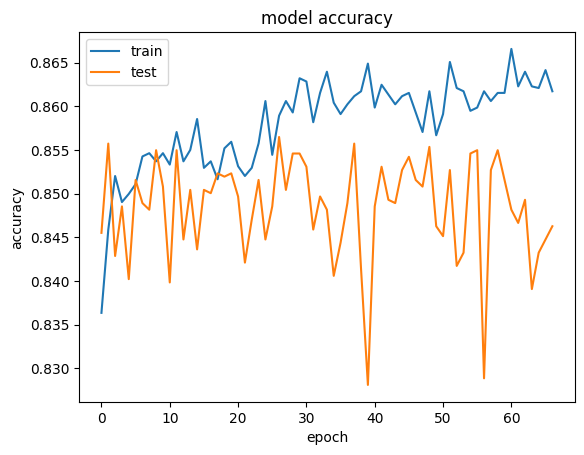

In [148]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

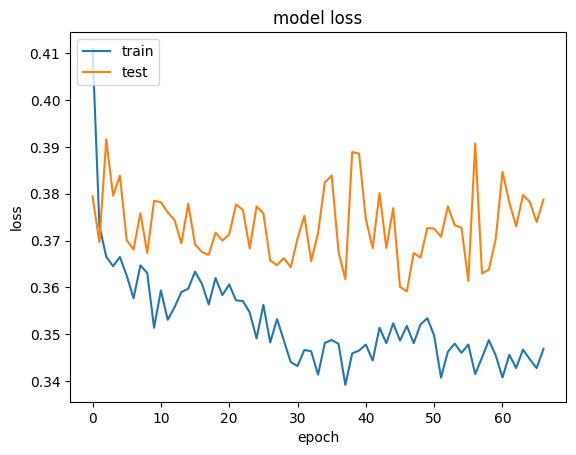

In [149]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [150]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [151]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1565,   30],
       [ 259,  146]])

In [152]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8555

In [153]:
##get the weights
classifiers = classifier.get_weights()
classifiers

[array([[-5.26997708e-02,  1.53837895e+00,  1.51833057e+00,
         -4.72663492e-01, -3.19968283e-01,  9.13603604e-01,
         -1.34740758e+00,  5.12206554e-03,  3.00667167e-01,
         -7.89562240e-02, -9.22785252e-02],
        [ 3.89834118e+00, -1.91187716e+00, -3.18358660e+00,
          2.04948139e+00, -2.86959434e+00, -7.84361482e-01,
          1.17416286e+00, -8.71509165e-02,  4.48099279e+00,
         -4.04044104e+00,  1.27742445e+00],
        [ 1.69523314e-01,  3.19203091e+00, -3.04046422e-01,
         -8.88868496e-02, -3.19114596e-01,  1.07661593e+00,
         -4.95798051e-01, -6.22777164e-01, -1.06623137e+00,
         -1.38877928e-01,  3.46538514e-01],
        [-3.57768953e-01, -1.20979559e+00,  1.77710664e+00,
         -2.61635661e+00,  4.86199856e+00, -4.32336426e+00,
         -3.79415303e-01,  4.37561893e+00,  2.98787856e+00,
         -2.76617765e-01,  6.56767249e-01],
        [ 9.93735492e-01,  2.19104218e+00,  1.32734478e-01,
         -6.15405035e+00,  2.15442109e+00,  